# SMS_Spam_Collection

Context   
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content    
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].    
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].    
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].    
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

Acknowledgements   
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

Inspiration    
Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

In [3]:
#Defining the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [35]:
#importing data set
df=pd.read_csv('spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
#Removing unwanted columns and renaming columns
df=df[['v1','v2']].rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4825
spam     747
Name: target, dtype: int64
--------------------------------------------------------


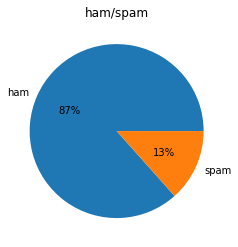

In [80]:
#Target value counts pie chart
print(df.target.value_counts())
print('--------------------------------------------------------')
labels=df.target.value_counts().keys()
plt.pie(df.target.value_counts(),labels=labels,autopct='%1.0f%%')
plt.title('ham/spam')
plt.show()

- There is imbalance in dataset target

In [81]:
#Checking null values.
df.isnull().sum()

target    0
text      0
dtype: int64

In [82]:
#Replacing target values ham with 0 and spam with 1.
df.target=np.where(df.target=='ham',0,1)
df.sample(5)

,target,text
2655,0,Great! I have to run now so ttyl!
3519,0,No it will reach by 9 only. She telling she wi...
5190,1,Our records indicate u maybe entitled to 5000 ...
4512,1,Money i have won wining number 946 wot do i do...
2341,0,Tell dear what happen to you. Why you talking ...


In [ ]:
#Text cleaning.

In [84]:
#defining stemming function
stop_words=stopwords.words('english')
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

In [85]:
#Text cleaning function
def clean(x):
    data=x.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    data=word_tokenize(data)
    data=[word for word in data if word not in stop_words]
    data=[lemma.lemmatize(word) for word in data]
    data=' '.join(data)
    return data

In [86]:
df['clean_text']=df.text.apply(lambda x:clean(x))
df.head()

,target,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [87]:
#defining text to vector converting functions
cv=CountVectorizer(max_features=5000)
tf=TfidfVectorizer()

In [88]:
#defining dependent and independent features.
X=df.clean_text
y=df.target

In [94]:
#Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [95]:
#Converting text to vector
cv.fit(X_train)
X_train=cv.transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [100]:
#feature_names
print(cv.get_feature_names()[50:80])

['addicted', 'addie', 'adding', 'address', 'adewale', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'advance', 'adventure', 'adventuring', 'advice', 'advise', 'advisor', 'ae', 'aeronautics', 'aeroplane', 'afew', 'affair', 'affection', 'afghanistan', 'afraid', 'africa', 'african']


In [101]:
#data shapes
print('X:',X.shape)
print('y:',y.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X: (5572,)
y: (5572,)
X_train: (4457, 5000)
X_test: (1115, 5000)
y_train: (4457,)
y_test: (1115,)


In [107]:
#Result printing function
def result_print(model,X_train,X_test,y_train,y_test):
    y_pred=model.predict(X_train)
    print('train data summary:')
    print('-----------------------------------------------------------')
    print('Accuracy_score:\n',accuracy_score(y_train,y_pred))
    #print('confusion_matrix:\n',confusion_matrix(y_train,y_pred))
    print('confusion_matrix:')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='')
    plt.show()
    print('classification_report:')
    display(pd.DataFrame(classification_report(y_train,y_pred,output_dict=True)))
    print('\n==========================================================================================================\n')
    y_pred=model.predict(X_test)
    print('test data summary:')
    print('-----------------------------------------------------------')
    print('Accuracy_score:\n',accuracy_score(y_test,y_pred))
    #print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
    print('confusion_matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='')
    plt.show()
    print('classification_report:')
    display(pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)))

train data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9955126766883554
confusion_matrix:


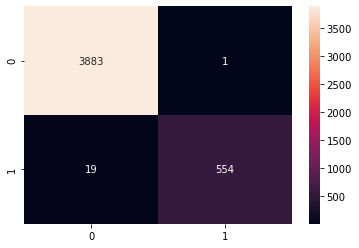

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.995131,0.998198,0.995513,0.996664,0.995525
recall,0.999743,0.966841,0.995513,0.983292,0.995513
f1-score,0.997431,0.982270,0.995513,0.989850,0.995482
support,3884.000000,573.000000,0.995513,4457.000000,4457.000000




test data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9748878923766816
confusion_matrix:


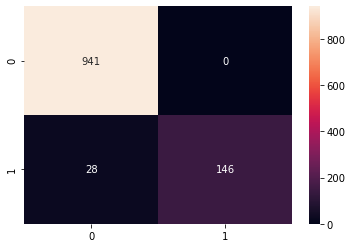

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.971104,1.00000,0.974888,0.985552,0.975614
recall,1.000000,0.83908,0.974888,0.919540,0.974888
f1-score,0.985340,0.91250,0.974888,0.948920,0.973973
support,941.000000,174.00000,0.974888,1115.000000,1115.000000


In [108]:
#Model building - Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=LogisticRegression()
model.fit(X_train,y_train)
result_print(model,X_train,X_test,y_train,y_test)

train data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9919228180390397
confusion_matrix:


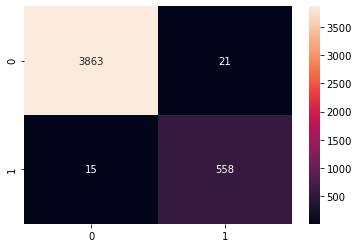

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.996132,0.963731,0.991923,0.979931,0.991966
recall,0.994593,0.973822,0.991923,0.984208,0.991923
f1-score,0.995362,0.968750,0.991923,0.982056,0.991941
support,3884.000000,573.000000,0.991923,4457.000000,4457.000000




test data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9847533632286996
confusion_matrix:


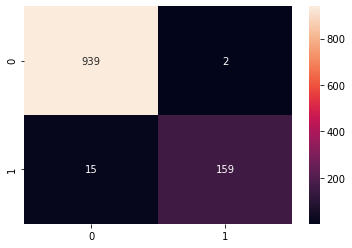

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.984277,0.987578,0.984753,0.985927,0.984792
recall,0.997875,0.913793,0.984753,0.955834,0.984753
f1-score,0.991029,0.949254,0.984753,0.970141,0.984510
support,941.000000,174.000000,0.984753,1115.000000,1115.000000


In [109]:
#Model building - MultinomialNB.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=MultinomialNB()
model.fit(X_train,y_train)
result_print(model,X_train,X_test,y_train,y_test)

train data summary:
-----------------------------------------------------------
Accuracy_score:
 1.0
confusion_matrix:


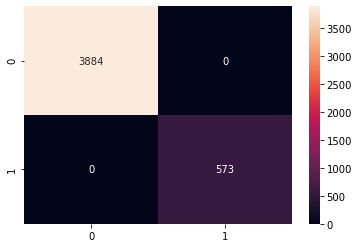

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,3884.0,573.0,1.0,4457.0,4457.0




test data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9802690582959641
confusion_matrix:


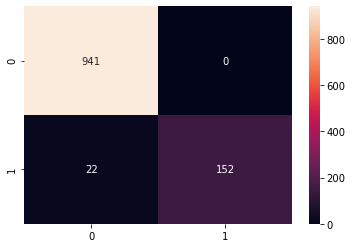

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.977155,1.000000,0.980269,0.988577,0.980720
recall,1.000000,0.873563,0.980269,0.936782,0.980269
f1-score,0.988445,0.932515,0.980269,0.960480,0.979717
support,941.000000,174.000000,0.980269,1115.000000,1115.000000


In [110]:
#Model building - MultinomialNB.
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=PassiveAggressiveClassifier()
model.fit(X_train,y_train)
result_print(model,X_train,X_test,y_train,y_test)